Example 1: Simple Binary Sequence


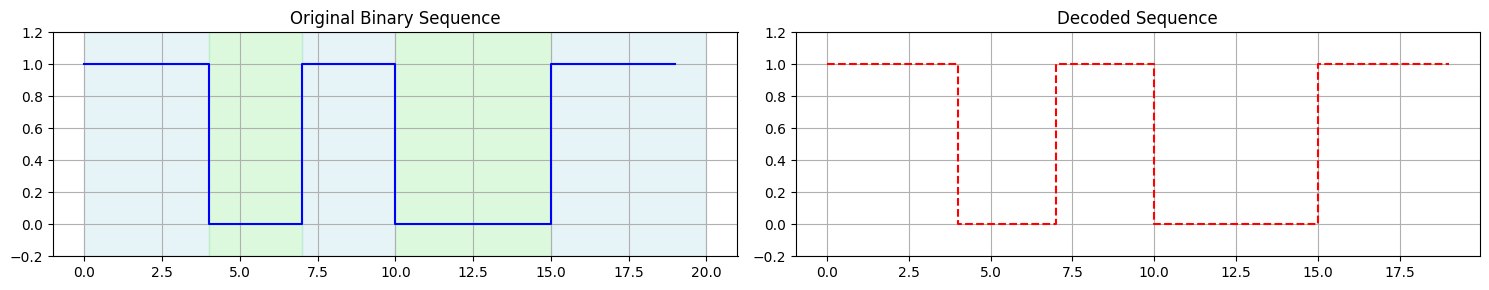

Original length: 20 bits
Encoded length: 10 bits
Compression ratio: 2.00:1

Encoded sequence:
(1, 4) (0, 3) (1, 3) (0, 5) (1, 5) 


Example 2: Image with Patterns


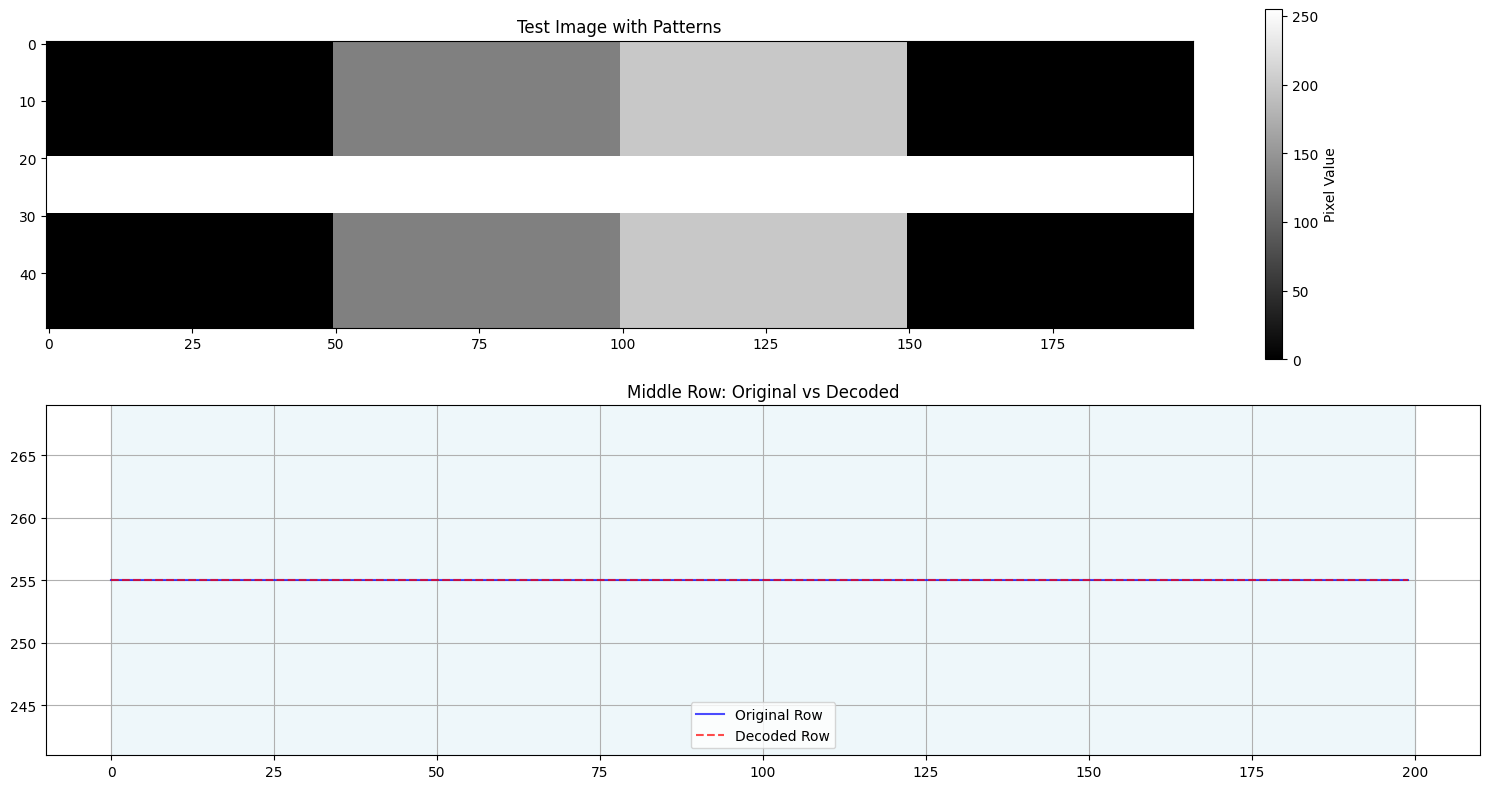


Image Row Analysis:
Original row size: 200 bytes
Encoded row size: 2 bytes
Compression ratio: 100.00:1

Encoded row sequence:
(200 pixels of value 255) 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class RunLengthEncoder:
    def __init__(self):
        """Initialize the RLE encoder with support for different data types."""
        pass

    def encode_binary(self, data):
        """
        Encode a binary sequence using basic RLE.
        Returns runs as (value, length) pairs.

        Parameters:
            data: Array-like object containing binary (0/1) values

        Returns:
            List of tuples, each containing (value, run_length)
        """
        # Convert input to numpy array if it isn't already
        data = np.asarray(data)
        if len(data) == 0:
            return []

        # Find where values change
        change_points = np.where(data[1:] != data[:-1])[0] + 1

        # Calculate run lengths
        if len(change_points) == 0:
            # Only one run in the entire sequence
            return [(data[0], len(data))]

        # Calculate run lengths from change points
        runs = []
        prev_idx = 0
        for idx in change_points:
            runs.append((data[prev_idx], idx - prev_idx))
            prev_idx = idx
        # Add the last run
        runs.append((data[prev_idx], len(data) - prev_idx))

        return runs

    def decode_binary(self, encoded_data):
        """
        Decode RLE-encoded binary data back to original sequence.

        Parameters:
            encoded_data: List of (value, count) tuples

        Returns:
            NumPy array containing the decoded sequence
        """
        decoded = []
        for value, count in encoded_data:
            decoded.extend([value] * count)
        return np.array(decoded)

    def encode_grayscale_row(self, row):
        """
        Encode a single row of grayscale values using RLE.

        Parameters:
            row: 1D NumPy array of grayscale values

        Returns:
            List containing alternating count and value entries
        """
        if len(row) == 0:
            return []

        # Find positions where values change
        change_points = np.where(row[1:] != row[:-1])[0] + 1

        encoded = []
        prev_idx = 0

        # Handle runs
        for idx in change_points:
            run_length = idx - prev_idx
            while run_length > 255:  # Handle runs longer than 255
                encoded.extend([255, row[prev_idx]])
                run_length -= 255
            if run_length > 0:
                encoded.extend([run_length, row[prev_idx]])
            prev_idx = idx

        # Handle the last run
        run_length = len(row) - prev_idx
        while run_length > 255:
            encoded.extend([255, row[prev_idx]])
            run_length -= 255
        if run_length > 0:
            encoded.extend([run_length, row[prev_idx]])

        return encoded

    def decode_grayscale_row(self, encoded_data):
        """
        Decode RLE-encoded grayscale data.

        Parameters:
            encoded_data: List of alternating count and value entries

        Returns:
            NumPy array containing the decoded values
        """
        decoded = []
        for i in range(0, len(encoded_data), 2):
            count = encoded_data[i]
            value = encoded_data[i + 1]
            decoded.extend([value] * count)
        return np.array(decoded)

def demonstrate_rle():
    """Create comprehensive demonstrations of RLE with visualizations."""
    encoder = RunLengthEncoder()

    # Example 1: Binary sequence
    print("Example 1: Simple Binary Sequence")
    binary_data = np.array([1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1])
    encoded = encoder.encode_binary(binary_data)
    decoded = encoder.decode_binary(encoded)

    # Visualize binary sequence
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.plot(binary_data, 'b-', drawstyle='steps-post', label='Original')
    plt.title('Original Binary Sequence')
    plt.grid(True)
    plt.ylim(-0.2, 1.2)

    # Show runs with alternating colors
    current_x = 0
    colors = ['lightblue', 'lightgreen']
    for i, (value, length) in enumerate(encoded):
        plt.axvspan(current_x, current_x + length,
                   color=colors[i % 2], alpha=0.3)
        current_x += length

    plt.subplot(122)
    plt.plot(decoded, 'r--', drawstyle='steps-post', label='Decoded')
    plt.title('Decoded Sequence')
    plt.grid(True)
    plt.ylim(-0.2, 1.2)

    plt.tight_layout()
    plt.show()

    # Print analysis of binary sequence
    original_bits = len(binary_data)
    encoded_bits = len(encoded) * 2  # Each pair needs value and count
    print(f"Original length: {original_bits} bits")
    print(f"Encoded length: {encoded_bits} bits")
    print(f"Compression ratio: {original_bits/encoded_bits:.2f}:1")
    print("\nEncoded sequence:")
    for value, count in encoded:
        print(f"({value}, {count})", end=' ')
    print("\n")

    # Example 2: Image with Patterns
    print("\nExample 2: Image with Patterns")

    # Create test image with distinct patterns
    test_image = np.zeros((50, 200), dtype=np.uint8)
    test_image[:, 50:100] = 128  # Gray rectangle
    test_image[:, 100:150] = 200  # Lighter rectangle
    test_image[20:30, :] = 255   # White horizontal stripe

    # Encode and analyze middle row
    middle_row = test_image[25, :]
    encoded_row = encoder.encode_grayscale_row(middle_row)
    decoded_row = encoder.decode_grayscale_row(encoded_row)

    # Visualize image and encoded row
    plt.figure(figsize=(15, 8))

    plt.subplot(211)
    plt.imshow(test_image, cmap='gray')
    plt.title('Test Image with Patterns')
    plt.colorbar(label='Pixel Value')

    plt.subplot(212)
    plt.plot(middle_row, 'b-', label='Original Row', alpha=0.7)
    plt.plot(decoded_row, 'r--', label='Decoded Row', alpha=0.7)
    plt.title('Middle Row: Original vs Decoded')
    plt.grid(True)
    plt.legend()

    # Add colored backgrounds to show runs
    current_x = 0
    colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightpink']
    for i in range(0, len(encoded_row), 2):
        count = encoded_row[i]
        plt.axvspan(current_x, current_x + count,
                   color=colors[(i//2) % len(colors)], alpha=0.2)
        current_x += count

    plt.tight_layout()
    plt.show()

    # Analysis of image compression
    print("\nImage Row Analysis:")
    original_size = len(middle_row)
    encoded_size = len(encoded_row)
    print(f"Original row size: {original_size} bytes")
    print(f"Encoded row size: {encoded_size} bytes")
    print(f"Compression ratio: {original_size/encoded_size:.2f}:1")
    print("\nEncoded row sequence:")
    for i in range(0, min(10, len(encoded_row)), 2):
        print(f"({encoded_row[i]} pixels of value {encoded_row[i+1]})", end=' ')
    print("\n")

    return encoder

# Run the demonstration with error handling
try:
    encoder = demonstrate_rle()
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("Please check the input data format and array shapes.")